In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
test=pd.read_csv("Titanic_test.csv")
train=pd.read_csv("Titanic_train.csv")


In [4]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
test.shape

(418, 11)

In [9]:
train.shape

(891, 12)

In [10]:
#joining train and test for EDA
df=pd.concat([train,test],axis=0)#merging with rows
df.reset_index(drop=True,inplace=True)#resetting the index
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [22]:
num_col = df.select_dtypes('number')
num_col

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,NaN,0,0,8.0500
1305,1306,NaN,1,39.0,0,0,108.9000
1306,1307,NaN,3,38.5,0,0,7.2500
1307,1308,NaN,3,NaN,0,0,8.0500


In [14]:
df['Pclass'].unique()#only three cases hence gives an imitation of encoded variable

array([3, 1, 2], dtype=int64)

In [15]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [16]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6, 9], dtype=int64)

In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


## *Visualizations*

In [19]:
obj_col = df.select_dtypes(include = 'object')
obj_col

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,NaN,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,NaN,S
1307,"Ware, Mr. Frederick",male,359309,NaN,S


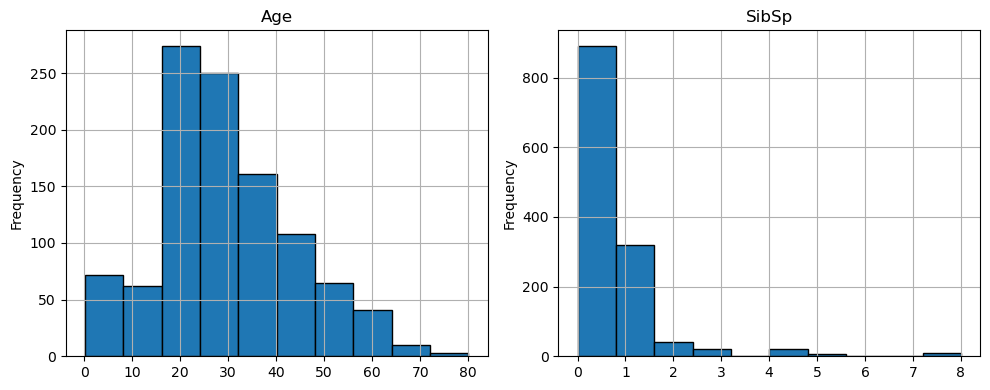

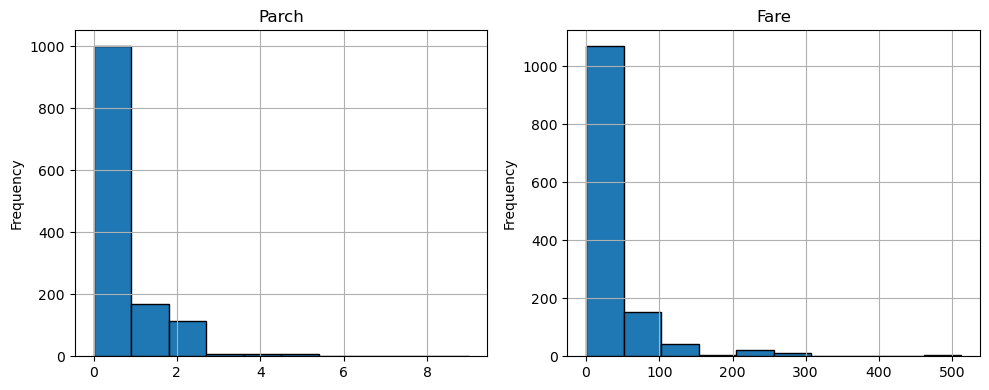

In [34]:
# Loop through in steps of 2
for i in range(3, len(num_cols), 2): #parsing from index 1 to omit passengerID
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 2 plots per row

    for j in range(2):  # up to 2 subplots per row
        if i + j < len(num_cols):
            col = num_cols[i + j]
            df[col].plot(kind='hist', title=col, edgecolor='black', ax=axes[j])
            axes[j].grid(True)
        else:
            axes[j].axis('off')  # hide empty subplot if odd number of plots

    plt.tight_layout()
    plt.show()

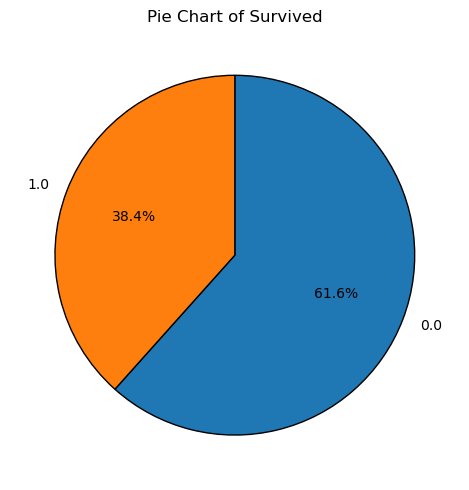

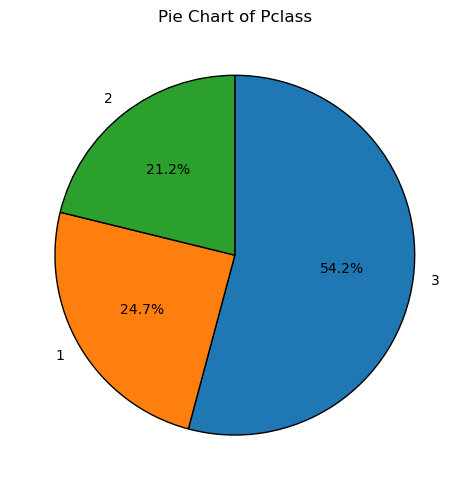

In [40]:
for col in num_cols[1:3]:
    plt.figure(figsize=(5, 5))
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        wedgeprops={'edgecolor': 'black'}
    )
    plt.title(f"Pie Chart of {col}")
    plt.ylabel('')  # Removes the default y-axis label
    plt.tight_layout()
    plt.show()

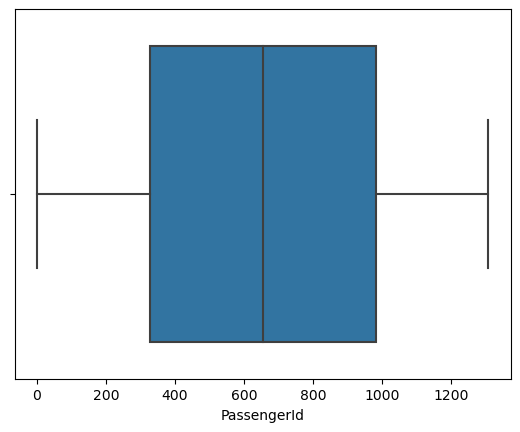

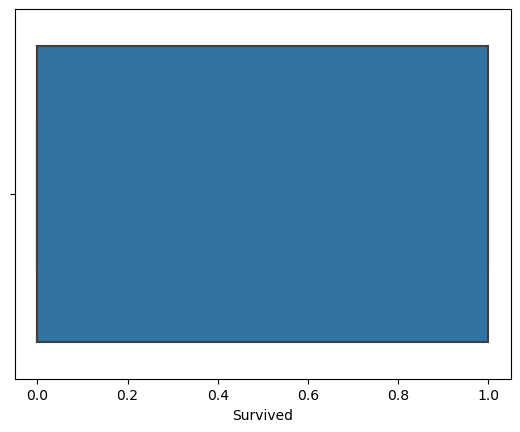

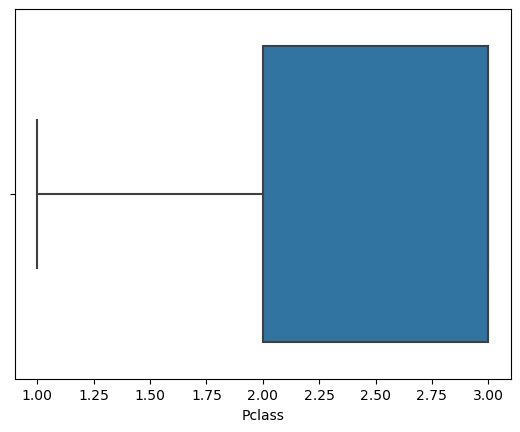

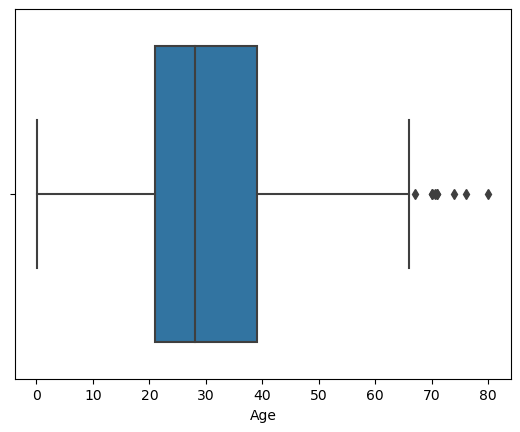

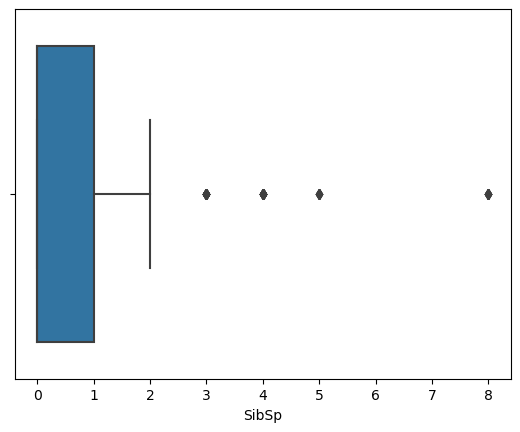

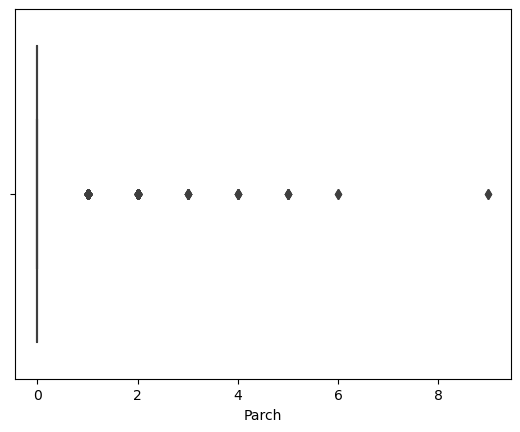

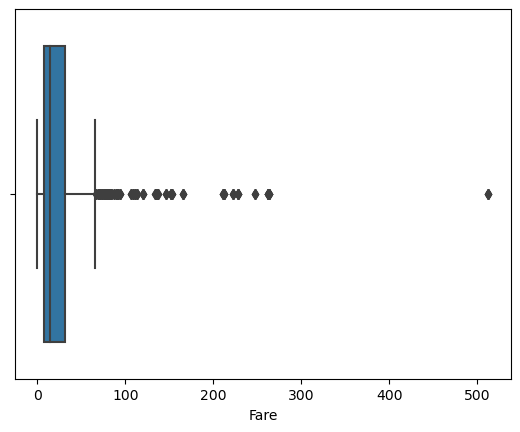

In [62]:
for i in num_col[3:]:
    plt.figure()
    sns.boxplot(x=num_col[i])
    plt.show()

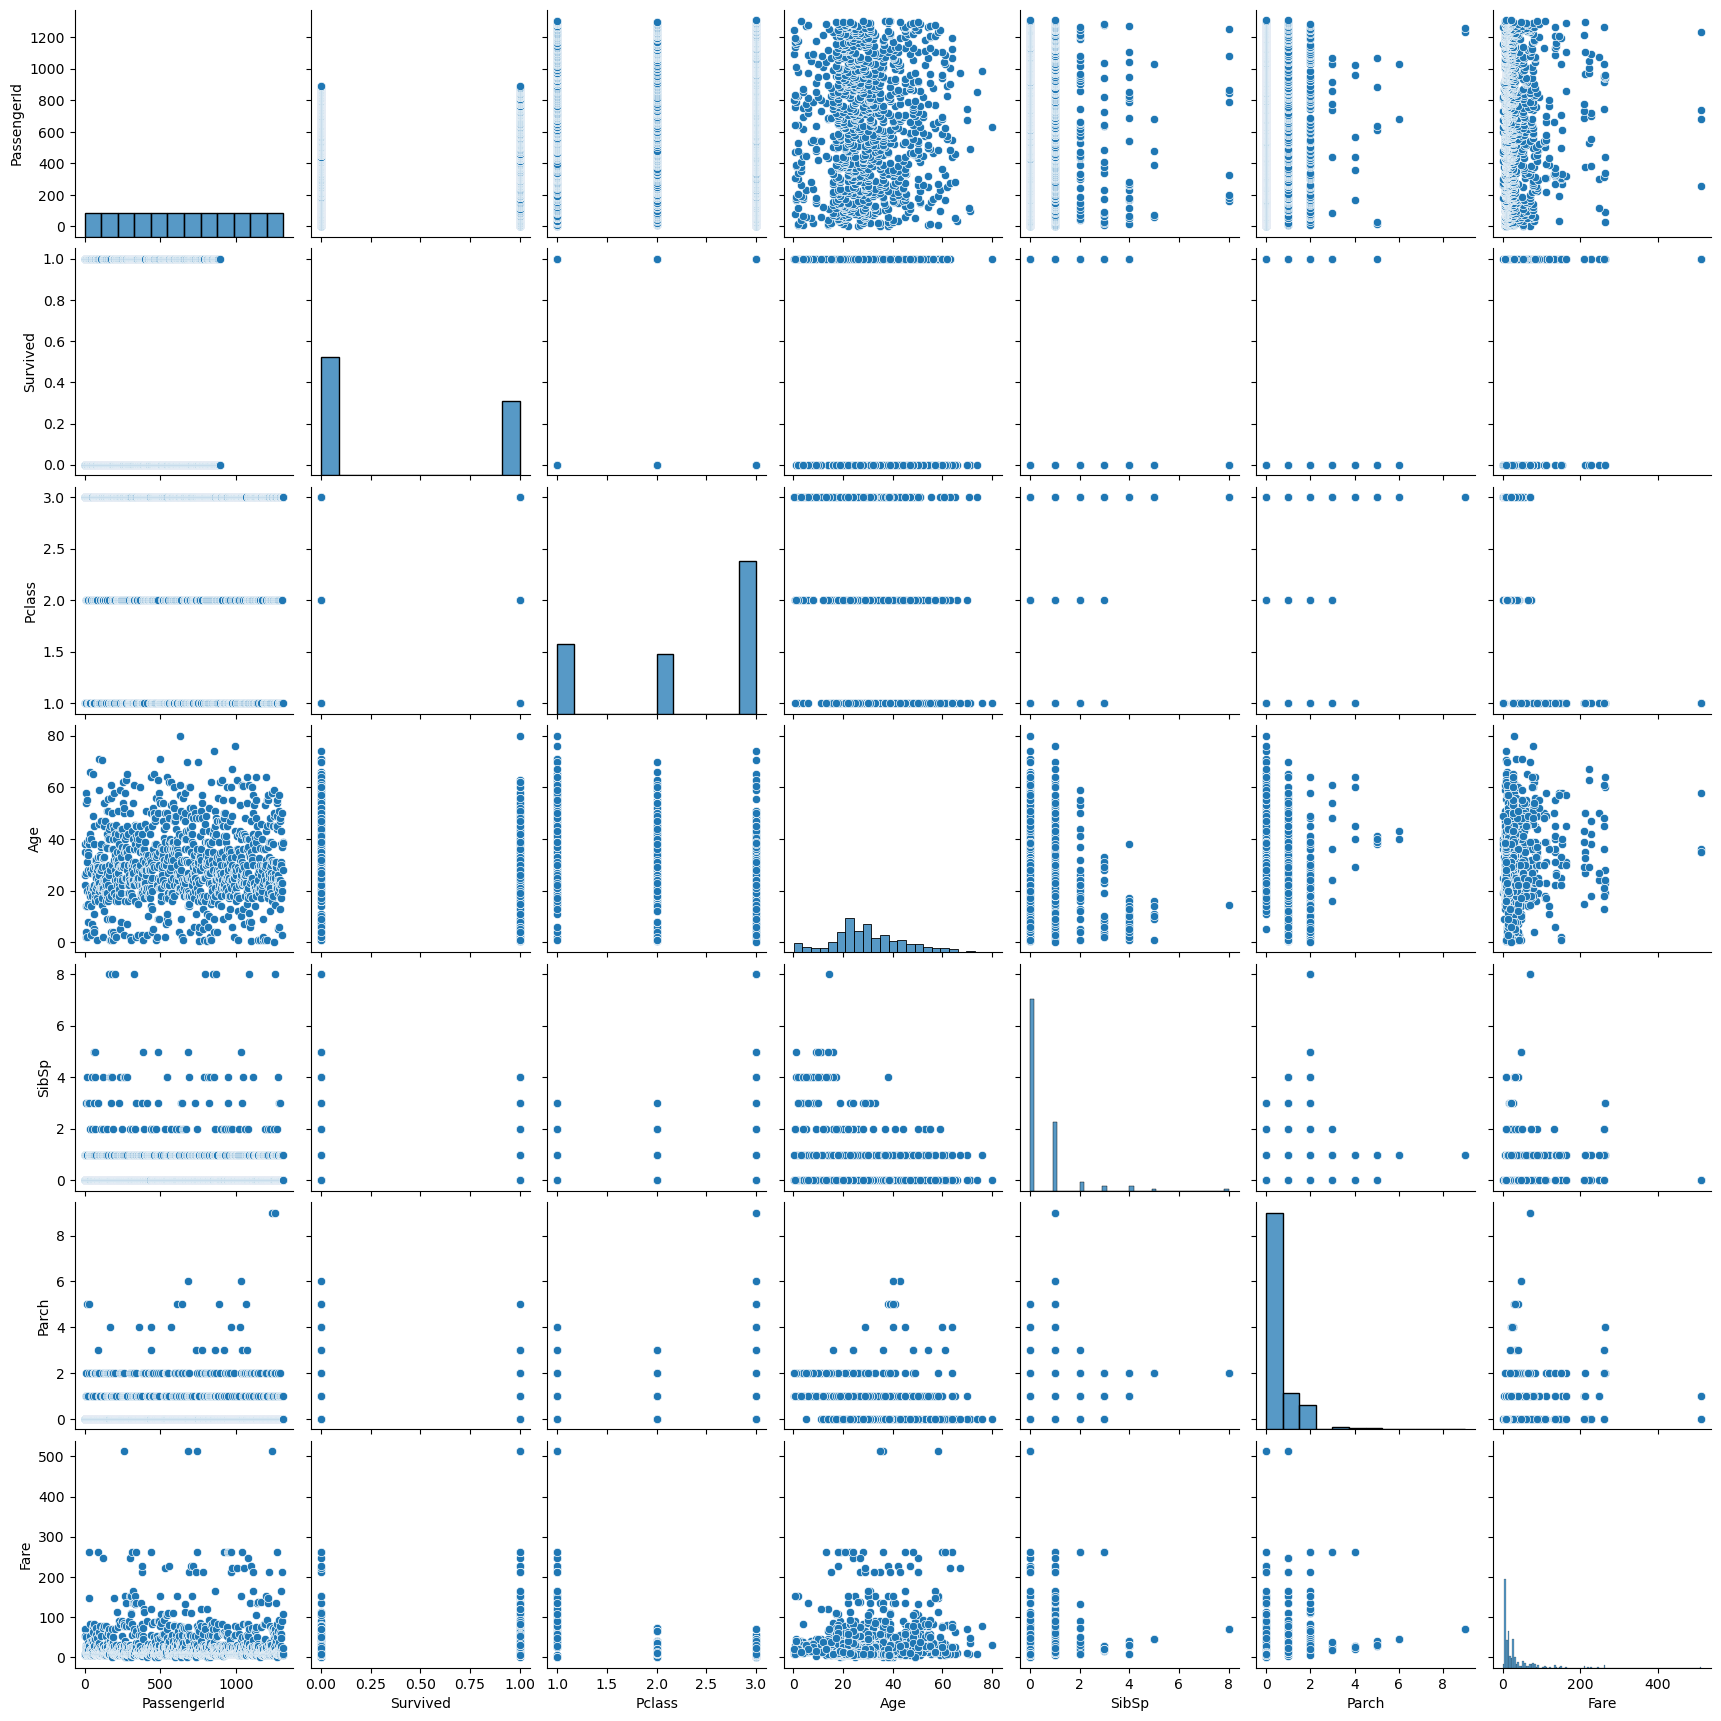

In [63]:
sns.pairplot(df)

In [68]:
cor_mat = num_col.corr()

<Axes: >

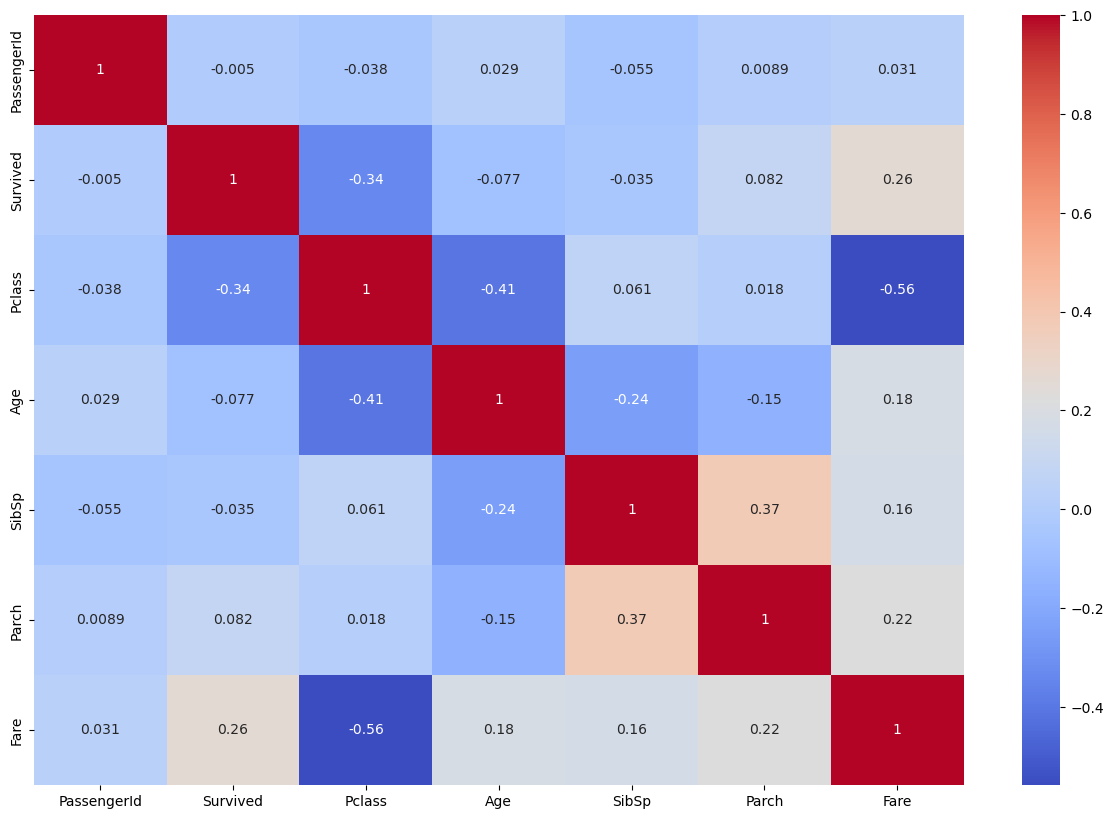

In [70]:
plt.figure(figsize=(15,10))
sns.heatmap(cor_mat,annot = True, cmap = 'coolwarm')

In [82]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [94]:
df['Survived'].fillna(df['Survived'].median(),inplace = True)

In [95]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [96]:
df['Fare'].fillna(df['Fare'].mean(),inplace = True)

In [79]:
train['Cabin'].shape

(891,)

In [103]:
df['Cabin'].fillna('ukn',inplace=True)

In [106]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [105]:
df=df.dropna(subset=["Embarked"])

In [111]:
train=train.dropna(subset=["Embarked"])
train['Age'].fillna(train['Age'].mean(),inplace = True)

In [112]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [121]:
test['Age'].fillna(test['Age'].mean(),inplace = True)
test['Cabin'].fillna('ukn',inplace=True)
test =test.dropna(subset = ['Fare'])

In [122]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [125]:
t_cor = train.corr()

<Axes: >

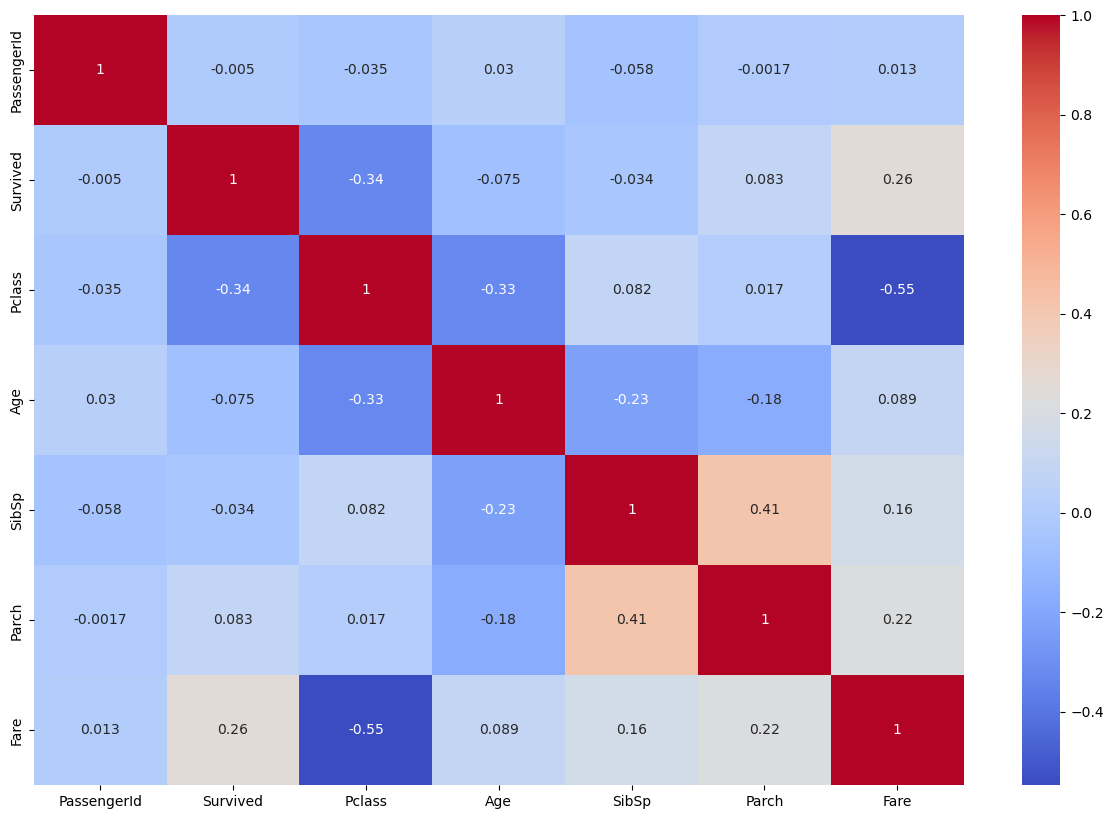

In [126]:
plt.figure(figsize=(15,10))
sns.heatmap(t_cor,annot = True, cmap = 'coolwarm')

In [127]:
train.corr()['Pclass'].sort_values(ascending=True)

Fare          -0.548193
Survived      -0.335549
Age           -0.328256
PassengerId   -0.035330
Parch          0.016824
SibSp          0.081656
Pclass         1.000000
Name: Pclass, dtype: float64

In [128]:
#we are performing the label Encoding on the categorical data

from sklearn.preprocessing import LabelEncoder  
label=LabelEncoder()       #storing the function in a instance

lab1=label.fit_transform(train['Embarked'])   #transforming the data
lab1=pd.DataFrame(lab1)                         #Creating the data frame
lab1.columns=["Embarked"]                       #giving the name for the column

#for test data
labt=label.fit_transform(test['Embarked'])
labt=pd.DataFrame(labt)
labt.columns=["Embarked"] 

#for train data sex column

lab2=label.fit_transform(train['Sex'])
lab2=pd.DataFrame(lab2)
lab2.columns=['Sex']



#for test data sex column

lab2t=label.fit_transform(test['Sex'])
lab2t=pd.DataFrame(lab2t)
lab2t.columns=['Sex']

In [129]:
labeltrain=pd.concat([lab1,lab2],axis=1)
labeltrain

,Embarked,Sex
0,2,1
1,0,0
2,2,0
3,2,0
4,2,1
...,...,...
884,2,1
885,2,0
886,2,0
887,0,1


In [130]:
labeltest=pd.concat([labt,lab2t],axis=1)
labeltest

,Embarked,Sex
0,1,1
1,2,0
2,1,1
3,2,1
4,2,0
...,...,...
412,2,1
413,0,0
414,2,1
415,2,1


In [131]:
#Colums to be Standardize or Normalize

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scale=scaler.fit_transform(train[['Age','Fare']])
scale=pd.DataFrame(scale)
scale.columns=['Age','Fare']


#for test data 

scaler=MinMaxScaler()

scalet=scaler.fit_transform(test[['Age','Fare']])
scalet=pd.DataFrame(scalet)
scalet.columns=['Age','Fare']

scale

,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713
...,...,...
884,0.334004,0.025374
885,0.233476,0.058556
886,0.367204,0.045771
887,0.321438,0.058556


In [132]:
#merging the all transformed columns in a single dataset

#train

df3=train[['SibSp','Parch','Pclass','Survived']]

df_train=pd.concat([scale,labeltrain,df3],axis=1)

df_train.dropna(inplace=True)  #checks for any null values and drop them
df_train.isnull().sum()

df_train

,Age,Fare,Embarked,Sex,SibSp,Parch,Pclass,Survived
0,0.271174,0.014151,2.0,1.0,1.0,0.0,3.0,0.0
1,0.472229,0.139136,0.0,0.0,1.0,0.0,1.0,1.0
2,0.321438,0.015469,2.0,0.0,0.0,0.0,3.0,1.0
3,0.434531,0.103644,2.0,0.0,1.0,0.0,1.0,1.0
4,0.434531,0.015713,2.0,1.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...
884,0.334004,0.025374,2.0,1.0,0.0,0.0,3.0,0.0
885,0.233476,0.058556,2.0,0.0,0.0,5.0,3.0,0.0
886,0.367204,0.045771,2.0,0.0,0.0,0.0,2.0,0.0
887,0.321438,0.058556,0.0,1.0,0.0,0.0,1.0,1.0


In [133]:
#merging all  the test dataset after data transformation

df2=test[['SibSp','Pclass','Parch']]

df_test=pd.concat([scalet,labeltest,df2],axis=1,ignore_index=True)

df_test.columns=['Age','Fare','Embarked','Sex','SibSp','Parch','Pclass']

df_test

,Age,Fare,Embarked,Sex,SibSp,Parch,Pclass
0,0.452723,0.015282,1.0,1.0,0.0,3.0,0.0
1,0.617566,0.013663,2.0,0.0,1.0,3.0,0.0
2,0.815377,0.018909,1.0,1.0,0.0,2.0,0.0
3,0.353818,0.016908,2.0,1.0,0.0,3.0,0.0
4,0.287881,0.023984,2.0,0.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...
413,0.512066,0.212559,0.0,0.0,0.0,3.0,0.0
414,0.505473,0.014151,2.0,1.0,0.0,1.0,0.0
415,0.396975,0.015713,2.0,1.0,0.0,3.0,0.0
416,0.396975,0.043640,0.0,1.0,0.0,3.0,0.0


In [134]:
df_test.isna().sum()

Age         1
Fare        1
Embarked    1
Sex         1
SibSp       1
Parch       1
Pclass      1
dtype: int64

In [135]:
df_test.dropna(inplace=True)
df_test.isna().sum()

Age         0
Fare        0
Embarked    0
Sex         0
SibSp       0
Parch       0
Pclass      0
dtype: int64

In [136]:
x=df_train.iloc[:,:7]  #independent variables using only pandas iloc func
y=df_train['Survived']  #Dependent variable

In [138]:
from sklearn.linear_model import LogisticRegression  #import the model 

model=LogisticRegression()     #creating a instance

log=model.fit(x,y)             #fitting the model

y_pred=model.predict(x)        #predicting on x data



y_pred_train=pd.DataFrame(y_pred,columns=['y_pred'])  #new dataframe

In [139]:
df_train.reset_index(drop=True, inplace=True)      #resetting the index because it may gets suffed
y_pred_train.reset_index(drop=True, inplace=True)
df_train1= pd.concat([df_train, y_pred_train], axis=1)  #concatenating both pred and train data to see difference
df_train1

,Age,Fare,Embarked,Sex,SibSp,Parch,Pclass,Survived,y_pred
0,0.271174,0.014151,2.0,1.0,1.0,0.0,3.0,0.0,0.0
1,0.472229,0.139136,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0.321438,0.015469,2.0,0.0,0.0,0.0,3.0,1.0,0.0
3,0.434531,0.103644,2.0,0.0,1.0,0.0,1.0,1.0,1.0
4,0.434531,0.015713,2.0,1.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
882,0.334004,0.025374,2.0,1.0,0.0,0.0,3.0,0.0,0.0
883,0.233476,0.058556,2.0,0.0,0.0,5.0,3.0,0.0,1.0
884,0.367204,0.045771,2.0,0.0,0.0,0.0,2.0,0.0,0.0
885,0.321438,0.058556,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [140]:
prob=model.predict_proba(x)

prob=prob.ravel()
prob

array([0.78490261, 0.21509739, 0.38912192, ..., 0.6197829 , 0.66158384,
       0.33841616])

In [141]:
#creating a column in table to see the predicted probability 

df_train1['predicted_prob']=pd.DataFrame(prob)

df_train1

,Age,Fare,Embarked,Sex,SibSp,Parch,Pclass,Survived,y_pred,predicted_prob
0,0.271174,0.014151,2.0,1.0,1.0,0.0,3.0,0.0,0.0,0.784903
1,0.472229,0.139136,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.215097
2,0.321438,0.015469,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.389122
3,0.434531,0.103644,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.610878
4,0.434531,0.015713,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.750062
...,...,...,...,...,...,...,...,...,...,...
882,0.334004,0.025374,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.770091
883,0.233476,0.058556,2.0,0.0,0.0,5.0,3.0,0.0,1.0,0.229909
884,0.367204,0.045771,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.586449
885,0.321438,0.058556,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.413551


In [142]:
x2=df_test.iloc[:,:]            #for total test dataset
y_test_pred=model.predict(x2)   #predicting on x data

y_test_pred=pd.DataFrame(y_test_pred,columns=['y_test_pred'])   #creating a dataframe

y_test_pred.value_counts()

y_test_pred
1.0            400
0.0             16
dtype: int64

In [143]:
#apply the cross validation using kfold

from sklearn.model_selection import cross_val_score,KFold

model=LogisticRegression()

kfold=KFold(n_splits=5,shuffle=True,random_state=37)  #splits the hole datset into 5 parts

scores=cross_val_score(model,x,y,cv=kfold,scoring='accuracy')

print("cross-validation-score:",scores)
print("mean accuracy        :",scores.mean()*100)

cross-validation-score: [0.65168539 0.71348315 0.74011299 0.6779661  0.65536723]
mean accuracy        : 68.77229734018917


In [144]:
#it will repeat more/multiple times for more stable evaluation

from sklearn.model_selection import RepeatedKFold

# Perform Repeated K-Fold Cross-Validation (e.g., 5 folds, repeated 3 times)
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=37)
scores = cross_val_score(model, x, y, cv=rkf, scoring='accuracy')

print("Repeated K-Fold CV Scores:", scores)
print()
print("Mean Accuracy:", scores.mean()*100)

Repeated K-Fold CV Scores: [0.65168539 0.71348315 0.74011299 0.6779661  0.65536723 0.69662921
 0.65730337 0.74011299 0.69491525 0.65536723 0.64044944 0.69662921
 0.62711864 0.75141243 0.71186441]

Mean Accuracy: 68.73611375610994


In [145]:
#{"suffile splitscross validation"} randomly splits the data into train/test
#multiple times without fixed folds it is also knows as monte carlo cv


from sklearn.model_selection import ShuffleSplit

suffle=ShuffleSplit(n_splits=10,test_size=0.20,random_state=37)
scores=cross_val_score(model,x,y,cv=suffle,scoring='accuracy')

print("shuffle split cv score",scores)
print()
print("mean accuracy",scores.mean())

shuffle split cv score [0.65168539 0.69662921 0.64044944 0.73033708 0.67977528 0.66853933
 0.69101124 0.68539326 0.70786517 0.65168539]

mean accuracy 0.6803370786516854


In [146]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,confusion_matrix


accuracy = accuracy_score(y, y_pred_train)
precision = precision_score(y, y_pred_train)
recall = recall_score(y, y_pred_train)
f1 = f1_score(y, y_pred_train)


# Display results
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1 Score  : {f1:.2f}")
print()
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred_train))

Accuracy  : 0.69
Precision : 0.63
Recall    : 0.44
F1 Score  : 0.52


Confusion Matrix:
[[459  89]
 [189 150]]


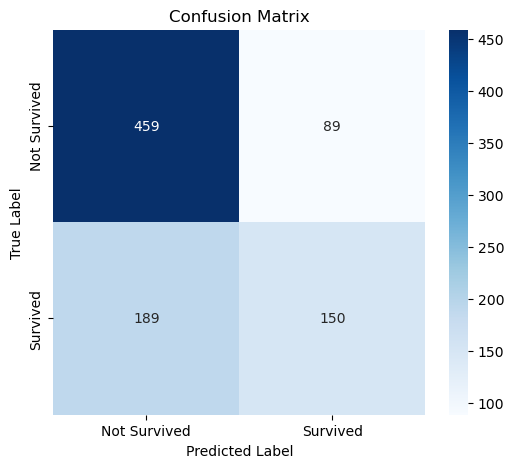

In [147]:
cm = confusion_matrix(y, y_pred_train)

# Define class labels
labels = ['Not Survived', 'Survived']

# Create heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

false positive rate      : [0.         0.16240876 1.        ]
true positive rate       : [0.         0.44247788 1.        ]
decision threshold values: [inf  1.  0.]


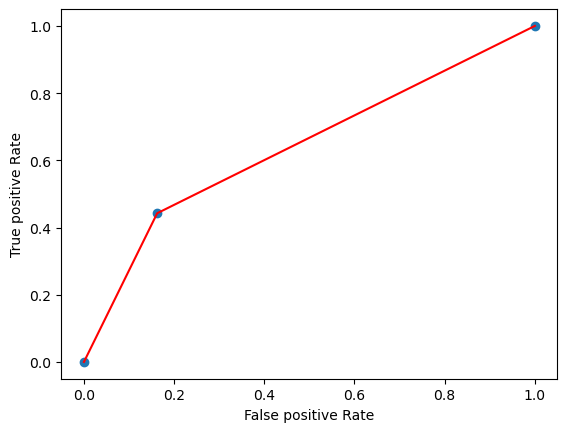

area  under curve 64.003


In [148]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,dummy=roc_curve(y,df_train1['y_pred'])

print("false positive rate      :",fpr)  #type 1 error

print("true positive rate       :",tpr)   #recall

print("decision threshold values:",dummy) 


plt.scatter(x=fpr,y=tpr)
plt.plot(fpr,tpr,color='red')
plt.ylabel("True positive Rate")
plt.xlabel("False positive Rate")
plt.show()

auc=roc_auc_score(y,df_train1['y_pred'])
print("area  under curve",(auc*100).round(3))

false positive rate      : [0.         0.16240876 1.        ]
true positive rate       : [0.         0.44247788 1.        ]
decision threshold values: [inf  1.  0.]


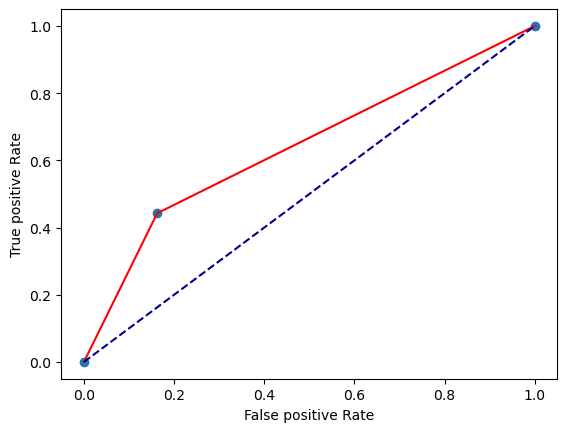

area  under curve 64.003


In [149]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,dummy=roc_curve(y,df_train1['y_pred'])

print("false positive rate      :",fpr)  #type 1 error

print("true positive rate       :",tpr)   #recall

print("decision threshold values:",dummy)


plt.scatter(x=fpr,y=tpr)
plt.plot(fpr, tpr, color='red', label=f"AUC={(roc_auc_score(y, df_train1['y_pred']) * 100).round(3)}")  

plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel("True positive Rate")
plt.xlabel("False positive Rate")
plt.show()

auc=roc_auc_score(y,df_train1['y_pred'])
print("area  under curve",(auc*100).round(3))

In [150]:
from sklearn.metrics import log_loss
loss = log_loss(y,y_pred)
print("loss :", np.round(loss,3))

loss : 11.297


In [151]:
df_train1

,Age,Fare,Embarked,Sex,SibSp,Parch,Pclass,Survived,y_pred,predicted_prob
0,0.271174,0.014151,2.0,1.0,1.0,0.0,3.0,0.0,0.0,0.784903
1,0.472229,0.139136,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.215097
2,0.321438,0.015469,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.389122
3,0.434531,0.103644,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.610878
4,0.434531,0.015713,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.750062
...,...,...,...,...,...,...,...,...,...,...
882,0.334004,0.025374,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.770091
883,0.233476,0.058556,2.0,0.0,0.0,5.0,3.0,0.0,1.0,0.229909
884,0.367204,0.045771,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.586449
885,0.321438,0.058556,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.413551


In [153]:
#threshold  depiction
results=[]
thresholds=np.arange(0.3,0.7,0.01)

for threshold in thresholds:
    y_pred1=(df_train1['predicted_prob']>threshold).astype(int)
    accuracy=accuracy_score(y,y_pred1)
    results.append([threshold,accuracy])
results 

[[0.3, 0.48252536640360766],
 [0.31, 0.4813979706877114],
 [0.32, 0.48252536640360766],
 [0.33, 0.4836527621195039],
 [0.34, 0.4836527621195039],
 [0.35000000000000003, 0.48478015783540024],
 [0.36000000000000004, 0.4859075535512965],
 [0.37000000000000005, 0.4836527621195039],
 [0.38000000000000006, 0.4813979706877114],
 [0.39000000000000007, 0.48703494926719276],
 [0.4000000000000001, 0.4926719278466742],
 [0.4100000000000001, 0.4926719278466742],
 [0.4200000000000001, 0.4983089064261556],
 [0.4300000000000001, 0.5016910935738444],
 [0.4400000000000001, 0.5084554678692221],
 [0.4500000000000001, 0.5107102593010147],
 [0.46000000000000013, 0.5118376550169109],
 [0.47000000000000014, 0.5140924464487034],
 [0.48000000000000015, 0.5140924464487034],
 [0.49000000000000016, 0.5163472378804961],
 [0.5000000000000002, 0.5163472378804961],
 [0.5100000000000002, 0.5163472378804961],
 [0.5200000000000002, 0.5186020293122886],
 [0.5300000000000002, 0.5186020293122886],
 [0.5400000000000003, 0.51

In [154]:
dft=pd.DataFrame(df_train1['predicted_prob']>0.46)

In [155]:
dft.value_counts(df_train1['predicted_prob']>0.46)

predicted_prob
True     456
False    431
dtype: int64

In [156]:
y_pred1=[]                        #creating a array and storing the results
for i in dft['predicted_prob']:
    if i>0.4:
        y_pred1.append(1)
    else:
        y_pred1.append(0)
        
y_pred1=pd.DataFrame(y_pred1,columns=['y_pred1'])
y_pred1

,y_pred1
0,1
1,0
2,0
3,1
4,1
...,...
882,1
883,0
884,1
885,0


In [157]:
df_train2=pd.concat([df_train1,y_pred1],axis=1)  #concatinating the results

df_train2

,Age,Fare,Embarked,Sex,SibSp,Parch,Pclass,Survived,y_pred,predicted_prob,y_pred1
0,0.271174,0.014151,2.0,1.0,1.0,0.0,3.0,0.0,0.0,0.784903,1
1,0.472229,0.139136,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.215097,0
2,0.321438,0.015469,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.389122,0
3,0.434531,0.103644,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.610878,1
4,0.434531,0.015713,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.750062,1
...,...,...,...,...,...,...,...,...,...,...,...
882,0.334004,0.025374,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.770091,1
883,0.233476,0.058556,2.0,0.0,0.0,5.0,3.0,0.0,1.0,0.229909,0
884,0.367204,0.045771,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.586449,1
885,0.321438,0.058556,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.413551,0


area under curve: 53.78124798139654


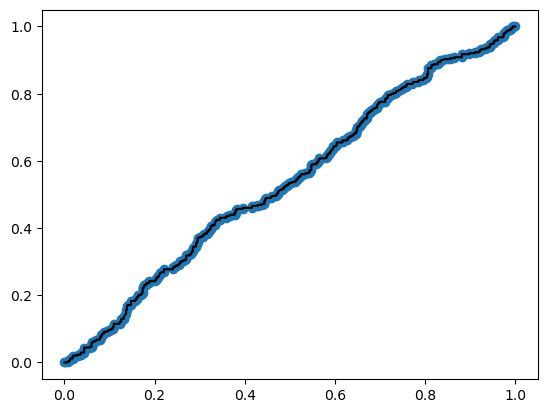

In [158]:
#creating a roc_auc curve with the predicted probability values 

fpr,tpr,dummy=roc_curve(y,df_train1['predicted_prob'])

plt.scatter(x=fpr,y=tpr)
plt.plot(fpr,tpr,color='black',label='"Roc_Curve"')

auc_score=roc_auc_score(y,df_train1['predicted_prob'])
print("area under curve:",auc_score*100)

In [160]:
import statsmodels.api as sm

X = df_train1.drop(columns=['Survived'])  # Independent variables
y = df_train1['Survived']  # Dependent variable

#X = sm.add_constant(X)  # Adding intercept so that model has a bias term
                       #the intercept ensures that B0 is present in equation
         
logit_model = sm.Logit(y, X) #fits a logisticregression model using statsmodel
                             #it uses logit function/formla for calculation

result = logit_model.fit()  #fits the model to data using MLE(maximum 
                                        #likehood estimator)


print(result.summary())  # View p-values and significance of each feature

Optimization terminated successfully.
         Current function value: 0.604568
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  887
Model:                          Logit   Df Residuals:                      878
Method:                           MLE   Df Model:                            8
Date:                Wed, 09 Jul 2025   Pseudo R-squ.:                 0.09105
Time:                        23:36:50   Log-Likelihood:                -536.25
converged:                       True   LL-Null:                       -589.97
Covariance Type:            nonrobust   LLR p-value:                 1.285e-19
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Age                0.2799      0.444      0.631      0.528      -0.590       1.150
Fare             

In [161]:
result.predict(X)

0      0.276730
1      0.531847
2      0.240181
3      0.634229
4      0.299642
         ...   
882    0.296887
883    0.598995
884    0.395739
885    0.582267
886    0.381678
Length: 887, dtype: float64

# EOF